In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/graduate-admissions/Admission_Predict.csv
/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv


## Regression Problem

In [2]:
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.drop(columns =['Serial No.'] , inplace = True)

In [11]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [9]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [10]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [12]:

from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(x,y,test_size=0.2 , random_state =1)

In [13]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
238,310,104,3,2.0,3.5,8.37,0
438,318,110,1,2.5,3.5,8.54,1
475,300,101,3,3.5,2.5,7.88,0
58,300,99,1,3.0,2.0,6.80,1
380,322,104,3,3.5,4.0,8.84,1
...,...,...,...,...,...,...,...
255,307,110,4,4.0,4.5,8.37,0
72,321,111,5,5.0,5.0,9.45,1
396,325,107,3,3.0,3.5,9.11,1
235,326,111,5,4.5,4.0,9.23,1


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [15]:
X_test_scaled

array([[0.46      , 0.48      , 0.25      , 0.375     , 0.25      ,
        0.44140625, 0.        ],
       [0.44      , 0.52      , 0.5       , 0.5       , 0.5       ,
        0.453125  , 1.        ],
       [0.98      , 1.        , 1.        , 0.875     , 0.75      ,
        0.9375    , 0.        ],
       [0.52      , 0.52      , 0.25      , 0.625     , 0.625     ,
        0.5234375 , 1.        ],
       [0.7       , 0.64      , 0.75      , 0.875     , 0.75      ,
        0.6484375 , 1.        ],
       [0.42      , 0.28      , 0.25      , 0.375     , 0.625     ,
        0.40625   , 1.        ],
       [0.6       , 0.4       , 0.5       , 0.5       , 0.625     ,
        0.5625    , 1.        ],
       [0.74      , 0.36      , 0.5       , 0.75      , 0.75      ,
        0.390625  , 1.        ],
       [0.62      , 0.68      , 0.5       , 0.625     , 0.75      ,
        0.59765625, 1.        ],
       [0.56      , 0.48      , 0.25      , 0.75      , 0.75      ,
        0.2421875 , 1. 

In [16]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(7, activation = 'relu' , input_dim = 7))
model.add(Dense(1,activation='linear'))


/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 64 (256.00 B)

 Trainable params: 64 (256.00 B)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss='mean_squared_error' , optimizer = 'Adam')

In [21]:
history = model.fit(X_train_scaled , Y_train , epochs = 15 , validation_split = 0.2)

Epoch 1/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.3578 - val_loss: 0.3426
Epoch 2/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.3035 - val_loss: 0.2782
Epoch 3/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2495 - val_loss: 0.2175
Epoch 4/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1904 - val_loss: 0.1609
Epoch 5/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1360 - val_loss: 0.1108
Epoch 6/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0919 - val_loss: 0.0695
Epoch 7/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0555 - val_loss: 0.0391
Epoch 8/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0340 - val_loss: 0.0209
Epoch 9/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0179 - val_loss: 0.0126
Epoch 10/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0111 - val_loss: 0.0100
Epoch 11/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0093 - val_loss: 0.0096
Epoch 12/15
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0100 - val_l

In [23]:
Y_pred = model.predict(X_test_scaled)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


In [24]:
from sklearn.metrics import r2_score
r2_score(Y_pred , Y_test)

0.7656133939497085

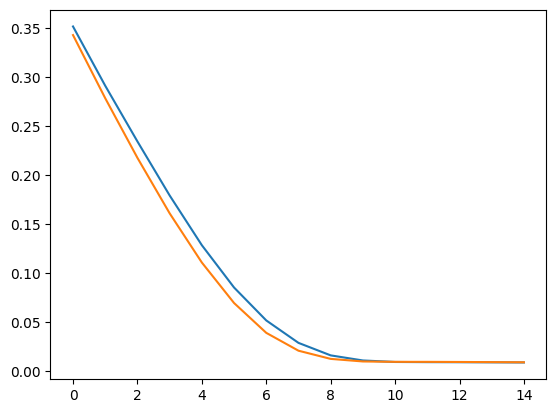

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])